# <center> Identifying plants disease project </center>

first we need to import libraries  and put random state

In [ ]:
from sklearn import metrics

In [ ]:
#libraties
!pip install gradio
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import os
import gradio as gr
#random state
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

## **1. Download and Read data**

### 1.1 download

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=1uoovX3TrkZrOIS3ARsWZEXEMCORWW1RK&confirm=t'
os.rename('uc?export=download&id=1uoovX3TrkZrOIS3ARsWZEXEMCORWW1RK&confirm=t', 'data_of_plants_leaf_diseases.zip')
!unzip data_of_plants_leaf_diseases.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a2dbdb1-188c-4499-acff-1bcc3b377320___Com.G_TgS_FL 8206_newPixel25.JPG  
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a53fede-6ec6-4e6c-a19f-ad1324604ca8___Com.G_TgS_FL 8086_180deg.JPG  
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a53fede-6ec6-4e6c-a19f-ad1324604ca8___Com.G_TgS_FL 8086_flipTB.JPG  
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a53fede-6ec6-4e6c-a19f-ad1324604ca8___Com.G_TgS_FL 8086_new30degFlipLR.JPG  
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a72a7cf-4406-4bad-9bf2-582ce0daaf86___Com.G_TgS_FL 8336.JPG  
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a72a7cf-4406-4bad-9bf2-582ce0daaf86___Com.G_TgS_FL 8336_180deg.JPG  
  inflating: data_of_plants_leaf_diseases/Tomato__Target_Spot/3a72a7cf-4406-4bad-9bf2-582ce0daaf86___Com.G_TgS_FL 8336_flipTB.JPG  
  inflating: data_of

### 1.2 read


In [ ]:
from pathlib import Path
import imghdr

img_link=list(Path("/content/data_of_plants_leaf_diseases").glob(r'**/*.jpg'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)
!rm -rf /content/data_of_plants_leaf_diseases/cotton__healthy/h420.webp

Total 27 pcs image delete from Dataset


In [ ]:
def read_dataset(path):  # path of data
    x = []  # images
    y = []  # labels

    # we will use os.listdir to read the contents of the folder
    labels = os.listdir(path)

    # iterate over the labels
    for label in labels:
        # we join the label to the path to get the path to the class folder which contains the images
        label_dir = os.path.join(path, label)

        # we will use os.listdir again to read the contents of the class folders (i.e., the images)
        images = os.listdir(label_dir)

        # iterate over the images
        for image in os.listdir(label_dir):
            # we join the image name to the path to get the path to the image
            image_path = os.path.join(
                label_dir, image
            ) 

            # append the image path and the label to the lists
            x.append(image_path)
            y.append(label)

    # return a dataframe with the image paths and labels
    return pd.DataFrame({"image": x, "label": y})


# read the data
data_df = read_dataset("data_of_plants_leaf_diseases")

In [ ]:
train_df , validation_df = model_selection.train_test_split(data_df,test_size= 0.2 , random_state=seed )

In [ ]:
label_to_index = dict(zip(pd.unique(train_df["label"]) , [item for item in range(35)]))
index_to_label = dict(zip([item for item in range(35)] ,pd.unique(train_df["label"])))

## **2. processing data (pipelines)**

In [ ]:
def image_to_resnet_tensor(x, y):
    # read the image from the path
    img = tf.io.read_file(x)
    # decode the image
    img = tf.image.decode_jpeg(img, channels=3)
    # resize the image
    img = tf.image.resize(img, [224, 224])
    # normalize the image
    img = img/225.0
    return img, y

def label_to_one_hot(x, y):
  y = tf.one_hot(y, depth=len(pd.unique(train_df["label"])))
  return x, y


def image_augmentation(x, y):
    # randomly flip the image horizontally
    img = tf.image.random_flip_left_right(x)
    # randomly flip the image vertically
    img = tf.image.random_flip_up_down(img)
    # randomly change the brightness of the image
    img = tf.image.random_brightness(img, max_delta=0.2)
    # clip the image to be between 0 and 1
    img = tf.clip_by_value(img, 0, 1)
    return img, y

train_df["label"] = train_df["label"].map(label_to_index)
validation_df["label"] = validation_df["label"].map(label_to_index)

In [ ]:
def tf_dataset_creator(x, y, training=False):
    # create a tf.data.Dataset from the input output pairs
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # map the image paths to tensors using the new resnet preprocessing function
    dataset = dataset.map(image_to_resnet_tensor)
    # map the labels to one-hot encoded vectors
    dataset = dataset.map(label_to_one_hot)
    # if training, apply image augmentation. Remember that we never apply image augmentation to the validation set
    if training:
        dataset = dataset.map(image_augmentation)
    # shuffle the dataset
    dataset = dataset.shuffle(1000)
    # batch the dataset
    dataset = dataset.batch(32)
    # auto tune data
    dataset = dataset.prefetch(tf.data.AUTOTUNE) 
    return dataset

train_dataset = tf_dataset_creator(train_df["image"], train_df["label"], training=True)
validation_dataset = tf_dataset_creator(validation_df["image"], validation_df["label"])

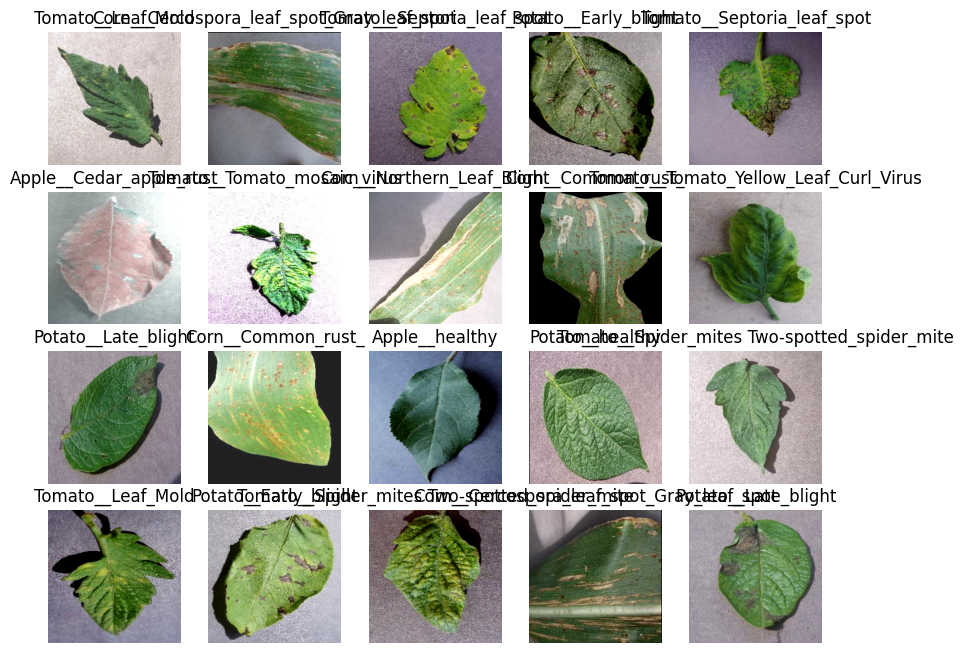

In [ ]:
for image, label in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(20):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(image[i].numpy())
        plt.title(index_to_label[np.argmax(label[i].numpy())])
        plt.axis("off")

## **3.model**

### **3.1 model building**

In [ ]:
# create resnet 

def residual_block(inputs, num_filters, kernel_size, strides, activation=tf.nn.relu):
    # Define shortcut connection
    shortcut = inputs
    
    # First convolution layer of the block
    x = tf.keras.layers.Conv2D(num_filters, kernel_size, strides=strides, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = activation(x)
    
    # Second convolution layer of the block
    x = tf.keras.layers.Conv2D(num_filters, kernel_size, strides=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    # Add the shortcut connection
    if strides > 1:
        shortcut = tf.keras.layers.Conv2D(num_filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
    x = tf.keras.layers.Add()([x, shortcut])
    x = activation(x)
    
    return x

In [ ]:
# create layers and model
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
    
x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.nn.relu(x)
    
    # Residual blocks
x = residual_block(x, 64, 3, 2)
x = residual_block(x, 128, 3, 2)
x = residual_block(x, 256, 3, 2)
x = residual_block(x, 512, 3, 2)
    
x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
outputs = tf.keras.layers.Dense(len(pd.unique(train_df["label"])), activation='softmax')(x)
    
    # Create model
model_A = tf.keras.Model(inputs , outputs)
model_A.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# should give 97%
model_A.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001,ema_momentum=0.9999),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

h= model_A.fit(train_dataset, epochs=40, validation_data=validation_dataset, callbacks=[early_stopping])

h

Epoch 1/40
1256/1256 [==============================] - 405s 294ms/step - loss: 1.8626 - accuracy: 0.4977 - val_loss: 1.1777 - val_accuracy: 0.6710
Epoch 2/40
1256/1256 [==============================] - 366s 289ms/step - loss: 1.1516 - accuracy: 0.6819 - val_loss: 0.8613 - val_accuracy: 0.7555
Epoch 3/40
1256/1256 [==============================] - 365s 290ms/step - loss: 0.9255 - accuracy: 0.7449 - val_loss: 0.6983 - val_accuracy: 0.8074
Epoch 4/40
1256/1256 [==============================] - 366s 290ms/step - loss: 0.7913 - accuracy: 0.7808 - val_loss: 0.5851 - val_accuracy: 0.8383
Epoch 5/40
1256/1256 [==============================] - 365s 290ms/step - loss: 0.6796 - accuracy: 0.8139 - val_loss: 0.4967 - val_accuracy: 0.8621
Epoch 6/40
1256/1256 [==============================] - 367s 290ms/step - loss: 0.5982 - accuracy: 0.8359 - val_loss: 0.4586 - val_accuracy: 0.8688
Epoch 7/40
1256/1256 [==============================] - 365s 290ms/step - loss: 0.5303 - accuracy: 0.8559 - val_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


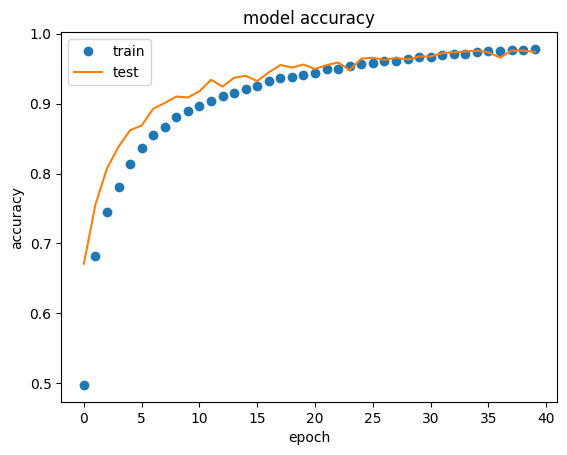

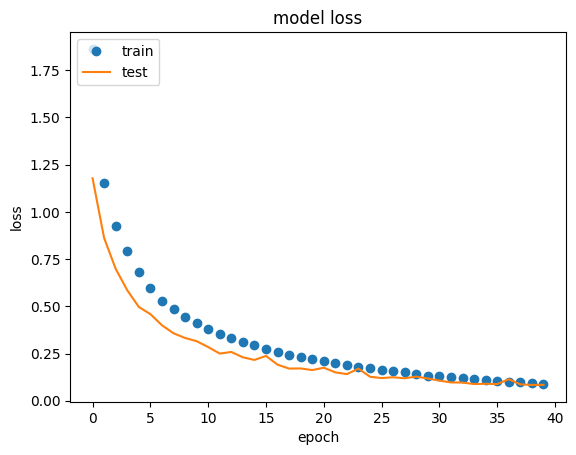

In [ ]:
plt.plot(h.history['accuracy'],'o')
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'],'o')
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **3.2 save and load model**

In [ ]:
# to save model 
model_A.save("Doctor_Plant.h5")

In [ ]:
# load it 
model_A = tf.keras.models.load_model('Doctor_Plant.h5')

## **4.interface** 

### كتابة بالعربي

In [ ]:
indt = {
0: 
'''
نوع النبات : تفاح 
نوع المرض : صدأ التفاح 
السبب : عدوى فطرية
العلاج : 
استخدم أصناف تفاح مقاومة للمرض ان وجدت

قلم أشجار السيدر لإزالة التورمات التيليتية

لا تزرع السيدر بالقرب من التفاح 

تتوفر الجراثيم البازيدية الناتجة من السيدر طول فترة الربيع ولذلك يجب استخدام المبيدات للوقاية والعلاج منذ تفتح البراعم حتى نهاية فصل الربيع. 

يرش التفاح أسبوعيا بأحد المبيدات التالية حسب شدة الإصابة. 

the fungicide includes chlorothalonil, mancozeb, propiconazole, sulfur, myclobutanil, or copper soap.

''',

1: 
'''
نوع النبات : تفاح 
نوع المرض : عفن اسود  
السبب : عدوى فطرية
العلاج :
علاج التعفن الأسود على أشجار التفاح يبدأ بالصرف الصحي نظرًا لأن الجراثيم الفطرية تغلب على الأوراق المتساقطة والفواكه المحنطة واللحاء الميت والسرطانات ، من المهم الحفاظ على جميع الحطام المتساقط والفواكه الميتة نظيفة بعيدًا عن الشجرة..

خلال فصل الشتاء ، تحقق من وجود علب حمراء وقم بإزالتها عن طريق قصها أو تشذيب الأطراف المصابة على بعد ست بوصات على الأقل من الجرح. قم بتدمير جميع الأنسجة المصابة فورًا وتراقب عن كثب بحثًا عن علامات جديدة للعدوى.

بمجرد السيطرة على مرض التعفن الأسود في شجرتك واستعادة حصاد ثمار صحية مرة أخرى ، تأكد من إزالة أي ثمار مصابة أو غزت الحشرات لتجنب إعادة العدوى. على الرغم من أنه يمكن استخدام مبيدات الفطريات للأغراض العامة ، مثل المرشات المصنوعة من النحاس والكبريت الجيرى ، للتحكم في العفن الأسود ، فلن يؤدي أي شيء إلى تحسين العفن الأسود للتفاح مثل إزالة جميع مصادر الجراثيم

''',

2: 
'''
نوع النبات : تفاح 
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج :  التفاح سليم لا يحتاج العلاج 
''',


3: 
'''
نوع النبات : الطماطم  
نوع المرض : فيروس تجعد ورق الطماطم الأصفر
السبب : فيروس
العلاج : 
لا يوجد علاجات للفيروسات. إذ لا يمكن أن تتماثل النباتات المصابة للشفاء؛ بالتالي، ينبغي صب التركيز على منع انتشار الفيروس. وفي حال إصابة بضعة نباتات فقط، ينبغي إزالتها من الحقل
''',

4: 
'''
نوع النبات : بطاطا
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج : البطاطا سليم لا تحتاج العلاج  
''',

5: '''
نوع النبات : طماطم
نوع المرض : التبقع البكتيري
السبب : بكتيريا
العلاج : 
عد ظهور المرض يجب التدخل السريع في علاج الأعراض وجميع المبيدات النحاسية والمضادات الحيوية تعتبر حلاً ناجحاً لوقف المرض والتخلص منة. وعلية جرت العادة بمقاومة مرض التبقع البكتيري بالمبديات النحاسية بمعدل 3-5 جرام للتر وتكرار الرش كل أسبوعين مرة حتى توقف المرض نهائياً وغالباً ما يتوقف بعد ثلاث رشات. وكلما كان المرض في بداياتة كانت الحلول أسرع وأفضل. ومن أشهر المبيدات المستخدمة هي أكسى كلورور نحاس أو تراى ميلتوكس فورت أو كوبروزان.  
''',


6: 
'''
نوع النبات : طماطم
نوع المرض : اللفحة المبكرة
السبب : فطر 
العلاج : 
 يعد برنامج رش مبيدات الفطريات جنبًا إلى جنب مع نظام التنبؤ المبكر بمرض اللفحة أكثر الوسائل فعالية للسيطرة على هذا المرض.
 استخدم تقنيات الصرف الصحي الميدانية مثل تناوب المحاصيل ومكافحة الحشائش ، وقم بقلب أو إزالة الحطام من المحاصيل السابقة لتقليل شدة المرض

''',
7: 
'''
نوع النبات : الرز
نوع المرض : احتراق أطراف أوراق الأرز
السبب : الظروف المحيطية
العلاج : 
استخدام مركبات مطهرة لنقع بذور الأرز قبل الزراعة مثل ميثيل والثيوفانات 

 رش الأوراق المحترقة بمركبات الإديفينفوس والفاليداميسين

 استعمال مركبات النحاس في حالة تقدم الأمراض الفطرية 

''',

8: 
'''
نوع النبات : عنب
نوع المرض : الحصبة السوداء  
السبب : الفطر
العلاج :  
حتى الآن ليس هناك طريقة فعالة للسيطرة على هذا المرض. إزالة الحبات المصابة والأوراق والجذع وتدميرها. وحماية النبات من الجروح  و تعقيم  أدوات التقليم . وكذلك طلاء الأفرع السميكة  باستخدام الكلس مع  5% حمض البوريك او استخدام الزيوت  الأساسية مضافا اليها المبيدات الفطرية المناسبة .   مبيدات الفطريات المستخدمة في العنب
(أزوكسيستروبين – كابتان -copper سلفات – فونجيسيدال سواب -kresoxim-ميثيل – مانكوزب)
''',

9: 
'''
نوع النبات : طماطم 
نوع المرض : فيروس تبرقش الطماطم 
السبب : فيروس 
العلاج :

زراعة أصناف مقاومة. استعمال أصناف الطماطم المقاومة لهذا المرض . وهناك أصناف عديدة من الطماطم مقاومة للمرض , واختبار أحدهما يكون بتجربة هذه الأصناف في البيئة المحلية , للتأكد من مقاومتها ومن صلاحية ثمارها للسوق المحلي . إن التجارب العديدة أثبتت أنه من الممكن , أن صنفا معينا يظهر مقاومة لهذا الفيروس في منطقة معينه , قد يصاب بالمرض نفسه في منطقة أخرى , لاختلاف في سلالة الفيروس المسبب لهذا المرض.

شتل النباتات السليمة.

عدم التدخين أثناء شتل النباتات والقيام بالعمليات الزراعية المختلفة , لأن مسبب هذا المرض موجود أيضاً في التبغ.

غسل الأيدي والأدوات بالماء والصابون بين فترة وأخرى , وخاصة بعد لمس النباتات المصابة.
حرق بقايا المحصول الذي يظهر عليه أعراض المرض في أخر الموسم , بدلاً من تركها في الحقل , وخلطها مع التربة , إذ إن مثل هذه البقايا تحمل مسبب المرض , وتكون مصدراً للعدوى في الموسم المقبل.

استعمال بذور سليمة من الفيروس. 
''',

10: 
'''
نوع النبات : تفاح 
نوع المرض : جرب التفاح 
السبب : عدوى فطرية
العلاج : من اجل العلاج يجب ان ترش الشجرة بمطهر فطري : 

المركبات الكبريتية:
يمكن استعمالها على عدة أصناف من التفاح، هذا وبالإضافة إلى فعاليتها في مقاومة الجرب والبياض الدقيقي (الرمد) ، فإنها تعطي بعض المقاومة للعناكب الحمراء، إلى أن فعالية هذه المركبات تكون قليلة نسبياً على درجات الحرارة المنخفضة، كما تسبب احتراق الأوراق وربما سقوطها في الأوقات الحارة خاصة على بعض الأصناف.

المركبات النحاسية:
يمكن استعمالها لمقاومة المرض، إلا أنها تسبب بعض الأضرار على الأشجار المرشوشة بها كاحتراق الأوراق وتقشب الثمار وربما سقوطها. وفي حال استعمالها فإنه ينصح بها للرشة الأولى والثانية فقط.

الكابتان:
تعتبر هذه المادة فعالة جداً في مقاومة جرب التفاح، كما أنها لاتؤدي إلى أية أضرار على الشجرة يمكن استعمالها بأمان خلال فترة الإزهار، وقد أدى استعمالها إلى محصول أعلى ونوعية ثمرية أفضل من تلك التي استعمل لها المركبات الكبريتية، إلا أنه لايقاوم البياض الدقيقي بل يمكن خلطه مع المركبات الكبريتية لمقاوم البياض. ويستعمل الكابتان للرش الوقائي. ويوجد بأسماء تجارية مثل كابتان ، أرثوسايد.

 الدودين:
مركب فعال جداً في مقاومة جرب التفاح، وله خواص وقائية وعلاجية ممتازة للمرض ولذا يستعمل للرش الوقائي والعلاجي. ويوجد بأسماء تجارية مختلفة مثل دودين ، دوجوادين ، سيبركس ، ميلبركس، سيليت ، كاربين ، كلادكس وربما بأسماء أخرى.

الثيرام:
يمكن استعماله لمقاومة الجرب خاصة بعد الإزهار وتأثيره، وقائي ويوجد أيضاً تحت اسم أراسان ،تيرسان، بومارسول ونوميرسان.

''',

11:
'''
نوع النبات : بطاطا
نوع المرض : اللفحة المتأخره 
السبب : فطريات
العلاج :  
رش المبيدات الفطرية 
مبيدات الفطريات الموصى بها للسيطرة على اللفحة المتأخرة
Mane .
Mancozeb .
Chlorothalonil .
Triphenyl tin hydroxide.
''',

12: 
'''
نوع النبات : طماطم
نوع المرض : التبقع السبتوري للأوراق الطماطم
السبب : فطر سيبتوريا ليكوبيرسيسي
العلاج :  
رش المبيدات الفطرية مكونة من النحاس مثل خليط بوردو او هيدروكسيد النحاس او كبريتات النحاس او كبريتات اوكسى كلوريد النحاس 
''',
13: 
'''
نوع النبات : الطماطم
نوع المرض : اللفحة المتأخره 
السبب : فطر 
العلاج :  
ازالة النباتات حول المنطقة المصابه والتخلص منها بشكل فوري او 
رش المبيدات الفطرية التي تحتوي على الماندي البروباميد او الكلوروثالونيل او الفلوازينام او المانكوزيب ضد اصابات اللفحة المتأخره
''',
14: 
'''
نوع النبات : طماطم
نوع المرض : اللفحة المبكرة
السبب : مرض فطري
العلاج :  
 ويمكن استخدام مبيدات الفطريات القائمة على أو التي تحتوي مزيج من الأزوكسيستروبين، البيرايكلوستيروبين، الديفينوكونازول، البوسيكاليد، الكلوروثالونيل، الفيناميدون، المانيب، المانكوزيب، التريفلو إكسيس تيروبين، والزيرام
 كما ويوصى بالتنوع والخلط بين المركبات الكيميائية المختلفة. وتطبيق العلاجات في الوقت المحدد مع مراعاة الظروف الجوية. تحقق بعناية من الوقت المسموح فيه بالرش قبل الحصاد، بحيث يمكنك الحصاد بأمان بعد تطبيق هذه المنتجات.
''',

15: 
'''
نوع النبات : ذره
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج :  ذره سليم لا تحتاج العلاج 
''',

16: 
'''
نوع النبات : عنب
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج : العنب سليم لا يحتاج العلاج 
''',

17: 
'''
نوع النبات : طماطم
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج :  طماطم سليم لا تحتاج العلاج 
''',
18: 
'''
نوع النبات : الذره 
نوع المرض : صدأ الذره الشائع 
السبب :  الفطريات بوتشينيا السرغي
العلاج :  
 قم برش مبيد فطري . يكون مبيد الفطريات أكثر فاعلية عندما يبدأ عند ظهور أول علامة للعدوى. قد يكون من الضروري تطبيقين. اتصل بمكتب الإرشاد المحلي للحصول على المشورة بشأن مبيدات الفطريات المحددة واستخداماتها.
''',
19: 
'''
نوع النبات : ذره
نوع المرض : لفحة أوراق الذُرة الشمالية 
السبب : فطريات
العلاج :  
بخلاف مبيدات الفطريات، فإن الطرق الفعالة للغاية لمكافحة هذه الأمراض هي معالجة مخلفات المحاصيل (الحرث والحرق) وتدوير المحاصيل مع الأنواع غير المضيفة بالإضافة إلى استخدام سلالات هجينة مقاومة للأمراض
''',
20: 
'''
نوع النبات : عنب
نوع المرض : عفن اسود 
السبب : الفطر
العلاج :  
عند ظهور أي أعراض للإصابة يجب القيام بعملية الرش للأشجار المصابة بأحد المركبات التالية
بيراكلوستروبين+ بوسكاليد (بيليز-ويلز-مافن )
دايفينوكونازول +ازوكسي ستروبين .
ستروبيلورين (فلينت )
''',


21: 
'''
نوع النبات : بطاطا
نوع المرض : اللفحة المبكره 
السبب : فطريات
العلاج :  
رش المبيدات الفطرية 
مبيدات الفطريات التي أظهرت فعالية ضد اللفحة المبكرة تحتوي على
Azoxystrobin ، trifloxystrobin ، famoxodone ، pyrethamil ، fenamidone و boscalid.
''',

22: 
'''
نوع النبات : الطماطم
نوع المرض : عثت العنكبوت 
السبب : الافات 
العلاج :  
إزالة الأعشاب الضارة ، لأنها خزان جيد لهذه الحشرات.
 يمكننا أيضًا الذهاب إلى متجر وشراء عثات أخرى تفترسها ، مثل Phytoseiulus persimilis و Amblyseius sp.
 يجب إزالة النباتات المصابة لمنع انتشارها، تجنب الأسمدة النيتروجينية الزائدة ، رش الكبريت ، حافظ على رطوبة الأوراق العالية ، لأنها تفضل البيئات الأكثر جفافاً أو تقوم بتدوير المحاصيل
''',
23: 
'''
نوع النبات : عنب
نوع المرض : لفحة اوراق
السبب : فطريات
العلاج :  
رش مبيدات الفطريات التقليدية ويكون رش المبيدات  بدايه  كل موسم للوقاية 
''',

24: 
'''
نوع النبات : القطن
نوع المرض : اللفحة البكتيرية للقطن
السبب : بكتريا 
العلاج :  
اعتماد الأصناف المقاومة طريقة ناجحة .

 اتباع دورة زراعية.

استخدام بذار سليم .

معاملة البذار بمواد كيميائية ((حلق البذور)) باستخدام حمض الكبريتيك المركز ، لكن هذه المعاملة لا تقضي على البكتريا داخل البذور).

 تجنب استخدام الري الرذاذي .

إتلاف مخلفات الأجزاء النباتية لمحصول القطن السابق ، ويمكن أن يتم ذلك بطمر هذه الأجزاء بحراثة عميقة بعد القطاف مباشرة.

 مكافحة حيوية:

باستخدام بعض أنواع البكتيريا المرافقة للبذور لمنع عدوى البادرات .

استخدام فطر Trichoderma spp.

استخدام مستخلص النيم/الآزدرخت مع مضادات حيوية ومبيدات فطرية حيث تتآثر معها في كبح تطور البكتيريا. 

''',
25: 
'''
نوع النبات : الطماطم
نوع المرض : قالب أوراق الطماطم
السبب : فطريات او عفن باسالورا فولفا
العلاج :  
عند الزراعة ، استخدم فقط البذور المعتمدة الخالية من الأمراض أو البذور المعالجة. إزالة وتدمير جميع بقايا المحاصيل بعد الحصاد. تطهير الدفيئة بين مواسم المحاصيل.
 استخدم المراوح وتجنب الري العلوي لتقليل رطوبة الأوراق. أيضا ، الحصة وتقليم النباتات لزيادة التهوية.
''',
26: 
'''
نوع النبات : الرز
نوع المرض : التبقع البني في الأرز
السبب : فطر
العلاج :  
استخدام مبيدات الفطريات (على سبيل المثال، الإيبروديون، البروبيكونازول، الأزوكسيستروبين، التريفلوكسيستروبين)
''',
27: 
'''
نوع النبات : القطن
نوع المرض : الذبول الفيوزاريومي ( الشلل)
السبب :  الفطر فيوزاريوم أوكسيسبورم فازينفكتم
العلاج :  

زراعة أصناف مقاومة

مقاومة النيماتودا الممرضة للنبات في التربة يقلل بطريقة غير مباشرة الإصابة بفطر الفيوزاريوم المسبب للذبول.

إتباع دورة زراعية مناسبة يساعد على قلة الإصابة بالمرض إلي حد كبير.

عدم الإفراط في التسميد الأزوتي مع العناية بالتسميد البوتاسي والفوسفاتي.

استخدام المبيدات الموصى بها في حالة الإصابة.

''',

28: 
'''
نوع النبات : القطن
نوع المرض : فيروس تجعيد القطن
السبب : فيروس
العلاج :  
زراعة الأصناف المقاومة تعتبر من أهم الطرق الفعالة في مقاومة المرض. 

القضاء على حشرة الذباب الأبيض الناقلة للمرض باستخدام المبيدات الحشرية الجهازية.

التخلص من مصادر العدوى وخاصه بقايا نباتات القطن في الحقل حيث أن الفيروس ينتقل فيها من موسم إلى آخر، إذ تنمو هذه البقايا معطية نموات خضرية غالبا ما تكون مصابة وذلك عند ري الأرض بعد إزالة القطن لزراعتها محاصيل اخرى.

إتباع دورة زراعية مناسبة.

''',
29: 
 '''
نوع النبات : قطن
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج :  قطن سليم لا يحتاج العلاج 
 ''',
30:
'''
نوع النبات : الذره 
نوع المرض : تبقع الأوراق الرمادي على الذرة
السبب : فطريات السيركوسبورا
العلاج :  
على المُزارع أن يختار زراعة سلالة هجينة مقاومة لمرض بقع الأوراق الرمادية لتجنب خسارة المحصول. يوصى بهذا بشدة في المناطق التي لها تاريخ معروف للإصابة بالفطريات. هذا الإجراء مع تدوير المحاصيل، قد يكون مفيدًا جدًا في علاج المرض عندما يُطبق المُزارع نظام الزرع المباشر أو بدون حرث.  تتوفر بعض مبيدات الفطريات المناسبة في السوق. ومع ذلك، يجب إجراء عملية الرش في أقرب وقت ممكن، خاصة عندما يكون من المتوقع وجود ظروف مواتية لنمو مُسبب الممرض وتكون السلالة الهجينة المزروعة عُرضة للإصابة.
''',
31: 
'''
نوع النبات : الرز
نوع المرض : اللفحة البكتيرية في الأرز
السبب :  بكتيريا زانثومونس أورزي
العلاج :  
إذا كانت متوفرة، لمكافحة اللفحة البكتيرية، يمكن استخدام  مضاد حيوي مسموح ومصرح باستخدامه بالإضافة إلى استخدام أوكسي كلوريد النحاس أو كبريتات النحاس،
''',
32: 
'''
نوع النبات : الرز
نوع المرض : التبقع البني في الأرز
السبب : فطر
العلاج :  
استخدام مبيدات الفطريات (على سبيل المثال، الإيبروديون، البروبيكونازول، الأزوكسيستروبين، التريفلوكسيستروبين)
''',
33: 
'''
نوع النبات : الرز
نوع المرض : لا يوجد
السبب : لا يوجد
العلاج :  الرز سليم لا يحتاج العلاج 

''',
34: '''
نوع النبات : الرز
نوع المرض : مرض انفجارالرز
السبب :  الأمراض الفطرية
العلاج :  
أفضل الممارسات لمنع انفجار الأرز هو الحفاظ على حقول الأرز مغمورة بعمق مع استمرار تدفق المياه. 

يتم معالجة تفجير الأرز عن طريق تطبيق مبيدات الفطريات في أوقات محددة من تطور النبات. هذا عادة ما يكون في وقت مبكر من الموسم ، ومرة ​​أخرى حيث أن النباتات في مرحلة التمهيد المتأخر ، ثم مرة أخرى حيث يتجه 80-90 ٪ من محصول الأرز.

طرق أخرى لمنع انفجار الأرز هي زرع البذور المعتمدة فقط خالية من الأمراض من النباتات الأرز مقاومة للأرز الانفجار.
'''}

### interface code

In [ ]:
def classify_image(img):
  img = img.reshape((-1, 224, 224, 3))
  img = img/225.0
  prediction = model_A.predict(img)
  confidences = indt[np.argmax(prediction)]
  return confidences

gr.Interface(
    fn=classify_image, 
    inputs=gr.inputs.Image(shape=(224, 224)),
    outputs=gr.inputs.Textbox(label="تحديد المرض وكيفية العلاج")
    ).launch(debug=True)